In [ ]:

#Problem Statement
Mobile apps collect user activity data every day
But we don’t know which users are:
1.Active
2.Inactive
3.risk
Because there is no predefined category
we use machine learning to group similar users automatically - Unsupervised Learning.

high engagement - who used daily,low engagement - rarely used (app)

In [ ]:
#advantange of the project

1.Improve user experience
2.Reduce users leaving the app (churn)
3.Increase profit
4.Send targeted offers

In [ ]:
#Business user cases
1.User Segmentation for Marketing
Divide users into groups to send better advertisements --> High users - premium offers,Low users - discount offers
2.Churn Risk Identification
find users who may stop using app soon. 1.Send reminder,Give offers,Improve onboarding.
3.Personalized User Experience
App shows different experience for different users. (eg:recommendations)
4.Product Feature Optimization
Understand which features users like most.
Company can improve those features.
5.Decision Making
Companies make decisions using data, not guessing.

In [98]:
#App User Behavior Segmentation Using Unsupervised Machine

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [117]:
df = pd.read_csv('raw_app user_behavior.csv')
df.head()

,user_id,age,gender,country,device_type,app_version,sessions_per_week,avg_session_duration_min,daily_active_minutes,feature_clicks_per_session,...,days_since_last_login,subscription_type,ads_clicked_last_30_days,content_downloads,social_shares,rating_given,churn_risk_score,engagement_score,account_age_days,marketing_source
0,100000,56,Female,India,iOS,2.1,5,3.41,52.71,13,...,20,Basic,9,5,2,NaN,0.31,55.79,1152,Referral
1,100001,46,Male,UK,iOS,1.0,8,24.44,42.03,7,...,7,Free,8,3,3,3.0,0.87,82.39,1059,Email Campaign
2,100002,32,Female,UK,iOS,1.2,12,5.34,76.69,7,...,33,Free,11,6,1,2.0,0.63,42.49,678,Google Ads
3,100003,25,Male,India,Android,2.0,5,3.98,65.38,16,...,17,Basic,6,3,1,3.0,0.43,62.81,92,Organic
4,100004,38,Male,Australia,Android,1.0,10,12.85,57.06,13,...,21,Basic,4,4,2,5.0,0.43,38.21,772,Email Campaign


In [100]:
df.shape

(50000, 25)

In [101]:
df.columns

Index(['user_id', 'age', 'gender', 'country', 'device_type', 'app_version',
       'sessions_per_week', 'avg_session_duration_min', 'daily_active_minutes',
       'feature_clicks_per_session', 'notifications_opened_per_week',
       'in_app_search_count', 'pages_viewed_per_session',
       'crash_events_last_30_days', 'support_tickets_raised',
       'days_since_last_login', 'subscription_type',
       'ads_clicked_last_30_days', 'content_downloads', 'social_shares',
       'rating_given', 'churn_risk_score', 'engagement_score',
       'account_age_days', 'marketing_source'],
      dtype='object')

In [102]:
df.info() # understanding
#data type & row

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   user_id                        50000 non-null  int64  
 1   age                            50000 non-null  int64  
 2   gender                         50000 non-null  object 
 3   country                        50000 non-null  object 
 4   device_type                    50000 non-null  object 
 5   app_version                    50000 non-null  float64
 6   sessions_per_week              50000 non-null  int64  
 7   avg_session_duration_min       50000 non-null  float64
 8   daily_active_minutes           50000 non-null  float64
 9   feature_clicks_per_session     50000 non-null  int64  
 10  notifications_opened_per_week  50000 non-null  int64  
 11  in_app_search_count            50000 non-null  int64  
 12  pages_viewed_per_session       50000 non-null 

In [103]:
df.describe() #mean,min,max,std [aggregation =complex dataset easier to analyse]

,user_id,age,app_version,sessions_per_week,avg_session_duration_min,daily_active_minutes,feature_clicks_per_session,notifications_opened_per_week,in_app_search_count,pages_viewed_per_session,crash_events_last_30_days,support_tickets_raised,days_since_last_login,ads_clicked_last_30_days,content_downloads,social_shares,rating_given,churn_risk_score,engagement_score,account_age_days
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,44978.000000,50000.000000,50000.000000,50000.000000
mean,124999.500000,38.513040,1.476126,7.999680,13.149842,45.164537,12.013920,4.99662,3.999060,13.470760,0.397520,0.19666,22.038240,5.995800,3.002260,2.001440,3.630664,0.500834,64.940409,603.785100
std,14433.901067,12.094948,0.470158,2.829438,8.946944,19.505118,3.480289,2.23518,1.997763,6.343635,0.633992,0.44442,12.985237,2.453313,1.731818,1.413435,1.087339,0.288578,14.838827,345.567524
min,100000.000000,18.000000,1.000000,0.000000,0.060000,5.000000,1.000000,0.00000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,10.000000,7.000000
25%,112499.750000,28.000000,1.100000,6.000000,6.570000,31.650000,10.000000,3.00000,3.000000,8.000000,0.000000,0.00000,11.000000,4.000000,2.000000,1.000000,3.000000,0.250000,54.900000,302.000000
50%,124999.500000,39.000000,1.200000,8.000000,11.240000,45.210000,12.000000,5.00000,4.000000,13.000000,0.000000,0.00000,22.000000,6.000000,3.000000,2.000000,4.000000,0.500000,65.025000,604.000000
75%,137499.250000,49.000000,2.000000,10.000000,17.570000,58.440000,14.000000,6.00000,5.000000,19.000000,1.000000,0.00000,33.000000,8.000000,4.000000,3.000000,4.000000,0.750000,75.090000,906.000000
max,149999.000000,59.000000,2.100000,26.000000,91.400000,129.130000,28.000000,16.00000,19.000000,24.000000,5.000000,4.00000,44.000000,19.000000,13.000000,11.000000,5.000000,1.000000,100.000000,1199.000000


In [104]:
df = df.drop('user_id', axis=1)
#removed user_id ,
#because it does not contribute to behavioral similarity and may introduce noise into clustering.

In [118]:
df.isnull().sum() #missing values


,0
user_id,0
age,0
gender,0
country,0
device_type,0
app_version,0
sessions_per_week,0
avg_session_duration_min,0
daily_active_minutes,0
feature_clicks_per_session,0


In [119]:
df['rating_given'] = df['rating_given'].fillna(0)



In [120]:
df.isnull().sum()

,0
user_id,0
age,0
gender,0
country,0
device_type,0
app_version,0
sessions_per_week,0
avg_session_duration_min,0
daily_active_minutes,0
feature_clicks_per_session,0


In [123]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Encoding Done. Shape:", df_encoded.shape)

Encoding Done. Shape: (50000, 36)


In [126]:
#converting categorical variable into numeric format by using label encoder- can use in ml -algorthim
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include='object').columns

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

#Applied StandardScaler to normalize the feature values,
#ensuring all variables contribute equally to the clustering process

from sklearn.preprocessing import StandardScaler
#data preparation
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


In [127]:
df['engagement_per_session'] = df['daily_active_minutes'] / (df['sessions_per_week'] + 1)

df['clicks_per_minute'] = df['feature_clicks_per_session'] / (df['avg_session_duration_min'] + 1)
df['inactive_ratio'] = df['days_since_last_login'] / (df['account_age_days'] + 1)
df['is_dormant'] = (df['days_since_last_login'] > 7).astype(int)
df['low_rating_flag'] = (df['rating_given'] <= 2).astype(int)
df['support_per_month'] = df['support_tickets_raised'] / (df['account_age_days']/30 + 1)
df['crash_rate'] = df['crash_events_last_30_days'] / (df['sessions_per_week'] + 1)
df['notification_engagement'] = df['notifications_opened_per_week'] / (df['sessions_per_week'] + 1)
df['is_paid_user'] = (df['app_version'] != 'free').astype(int)
df['ads_per_session'] = df['ads_clicked_last_30_days'] / (df['sessions_per_week'] + 1)
df['content_engagement'] = df['content_downloads'] + df['social_shares']
df['account_age_months'] = df['account_age_days'] / 30
df['behavior_score'] = (
    df['sessions_per_week'] * 0.3 +
    df['daily_active_minutes'] * 0.3 +
    df['feature_clicks_per_session'] * 0.2 +
    df['pages_viewed_per_session'] * 0.2
)
df['high_inactivity'] = (df['days_since_last_login'] > 14).astype(int)
df['high_crashes'] = (df['crash_events_last_30_days'] > 3).astype(int)
df['engagement_segment'] = pd.qcut(df['engagement_score'], q=4, labels=False)
X = df.drop('churn_risk_score', axis=1)
y = df['churn_risk_score']

In [128]:
features = [
    'sessions_per_week',
    'avg_session_duration_min',
    'daily_active_minutes',
    'feature_clicks_per_session',
    'notifications_opened_per_week',
    'in_app_search_count',
    'pages_viewed_per_session',
    'ads_clicked_last_30_days',
    'content_downloads',
    'social_shares',
    'rating_given',
    'churn_risk_score',
    'engagement_score',
    'account_age_days',
    'days_since_last_login'
]

X = df[features]
# data scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(50000, 15)

In [129]:
# -----------------------------
# FEATURE SELECTION
# -----------------------------

# Remove identifiers & target-like variables
drop_cols = [
    'user_id',               # identifier
    'churn_risk_score',      # target-like
    'engagement_score'       # derived metric
]

X = df.drop(columns=drop_cols, errors='ignore')

print("Feature matrix shape:", X.shape)

Feature matrix shape: (50000, 49)


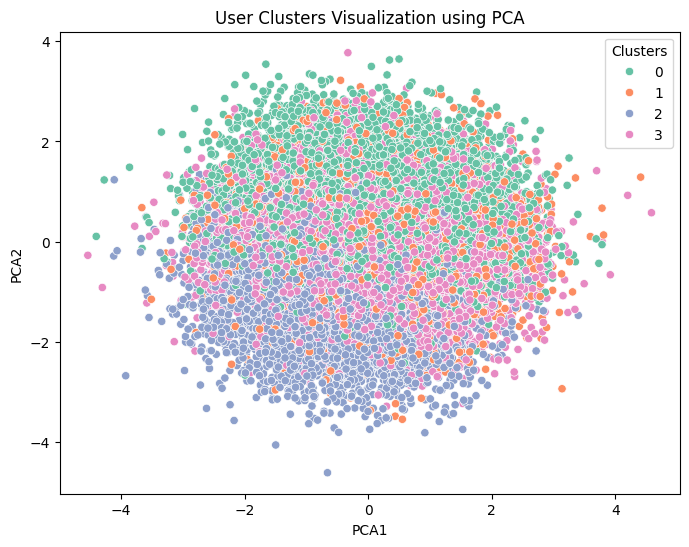

In [130]:
# Data scaling
#kmeans will work best, when doing scaling

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Create KMeans model
kmeans = KMeans(n_clusters=4, random_state=42)

# Generate cluster labels
df['Clusters'] = kmeans.fit_predict(X_scaled)

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Clusters', palette='Set2')

plt.title("User Clusters Visualization using PCA")
plt.show()


In [ ]:
#Clustering Model Selection - kmeans
#1.We want to group similar users
#2. no label in dataset


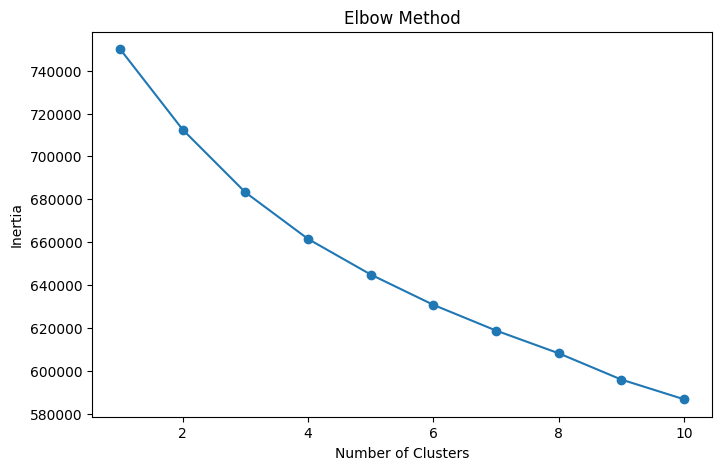

In [131]:
# Find Optimal Clusters (Elbow Method) *****

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [132]:
# Cluster Assignment
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)

clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters
df.head()

,user_id,age,app_version,sessions_per_week,avg_session_duration_min,daily_active_minutes,feature_clicks_per_session,notifications_opened_per_week,in_app_search_count,pages_viewed_per_session,...,content_engagement,account_age_months,behavior_score,high_inactivity,high_crashes,engagement_segment,PCA1,PCA2,Clusters,Cluster
0,100000,56,2.1,5,3.41,52.71,13,5,8,8,...,7,38.400000,21.513,1,0,1,-1.519227,-0.337054,2,2
1,100001,46,1.0,8,24.44,42.03,7,7,3,7,...,6,35.300000,17.809,0,0,3,-1.466487,1.210943,1,1
2,100002,32,1.2,12,5.34,76.69,7,5,2,21,...,7,22.600000,32.207,1,0,0,-0.780733,-1.265089,2,2
3,100003,25,2.0,5,3.98,65.38,16,8,4,13,...,4,3.066667,26.914,1,0,1,0.135754,-1.015315,3,3
4,100004,38,1.0,10,12.85,57.06,13,7,3,15,...,6,25.733333,25.718,1,0,0,1.068950,-0.278391,0,0


In [133]:
# # cluster-Level User Profiling
cluster_profile = df.groupby('Cluster').mean()
cluster_profile

,user_id,age,app_version,sessions_per_week,avg_session_duration_min,daily_active_minutes,feature_clicks_per_session,notifications_opened_per_week,in_app_search_count,pages_viewed_per_session,...,ads_per_session,content_engagement,account_age_months,behavior_score,high_inactivity,high_crashes,engagement_segment,PCA1,PCA2,Clusters
Cluster,,,,,,,,,,,,,,,,,,,,,
0,124986.808028,38.587957,1.475655,8.061216,10.060113,44.961721,12.078158,4.977037,4.013164,13.313459,...,0.743827,5.028867,30.555624,20.985205,0.669244,0.001122,1.513991,0.067487,0.548371,0.0
1,124904.861242,38.507207,1.476398,7.985181,28.996574,44.843772,11.960663,4.999865,3.961875,13.718039,...,0.747379,5.011990,20.451264,20.984426,0.673447,0.000135,1.492658,0.158031,0.085237,1.0
2,124880.598869,38.348985,1.476488,7.917051,11.665736,45.694939,12.001846,4.965621,3.985579,13.474504,...,0.754640,5.053299,20.013163,21.178867,0.664398,0.001038,1.482234,-0.444378,-1.016274,2.0
3,125114.305852,38.524604,1.476292,7.986799,10.060322,45.236386,11.979256,5.030585,4.008132,13.517709,...,0.750074,4.949614,9.630055,21.066349,0.666804,0.000530,1.497672,0.090493,-0.065594,3.0


In [134]:
cluster_0_users = df[df['Cluster'] == 0]
cluster_1_users = df[df['Cluster'] == 1]
cluster_2_users = df[df['Cluster'] == 2]
cluster_3_users = df[df['Cluster'] == 3]
df['Cluster'].value_counts()

,count
Cluster,
3,16969
0,16940
2,8668
1,7423


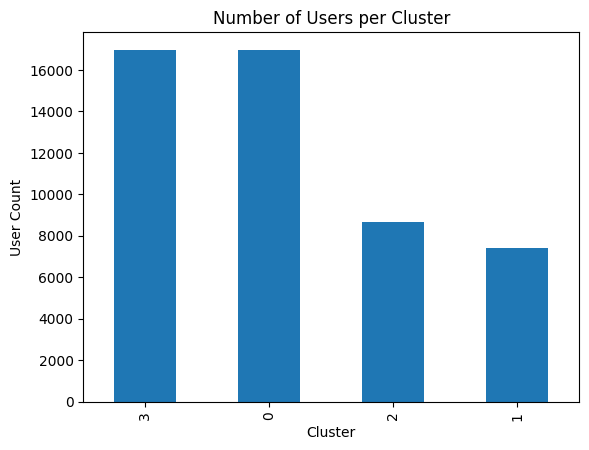

In [135]:
df['Clusters'].value_counts().plot(kind='bar')

plt.title("Number of Users per Cluster")
plt.xlabel("Cluster")
plt.ylabel("User Count")

plt.show()


In [136]:
# Analyze Average Engagement & Behavior
cluster_profile = df.groupby('Cluster')[[
    'age',
    'sessions_per_week',
    'avg_session_duration_min',
    'daily_active_minutes',
    'feature_clicks_per_session',
    'notifications_opened_per_week',
    'in_app_search_count',
    'pages_viewed_per_session',
    'crash_events_last_30_days',
    'support_tickets_raised',
    'days_since_last_login',
    'ads_clicked_last_30_days',
    'content_downloads',
    'social_shares',
    'rating_given',
    'churn_risk_score',
    'engagement_score',
    'account_age_days'
]].mean()

cluster_profile

,age,sessions_per_week,avg_session_duration_min,daily_active_minutes,feature_clicks_per_session,notifications_opened_per_week,in_app_search_count,pages_viewed_per_session,crash_events_last_30_days,support_tickets_raised,days_since_last_login,ads_clicked_last_30_days,content_downloads,social_shares,rating_given,churn_risk_score,engagement_score,account_age_days
Cluster,,,,,,,,,,,,,,,,,,
0,38.587957,8.061216,10.060113,44.961721,12.078158,4.977037,4.013164,13.313459,0.386895,0.194982,22.081818,5.981818,3.014404,2.014463,3.877450,0.503630,65.158055,916.668713
1,38.507207,7.985181,28.996574,44.843772,11.960663,4.999865,3.961875,13.718039,0.394989,0.202075,22.216220,5.977907,3.024788,1.987202,3.592483,0.495084,64.921047,613.537923
2,38.348985,7.917051,11.665736,45.694939,12.001846,4.965621,3.985579,13.474504,0.409668,0.195201,21.903669,6.001500,3.023650,2.029649,0.615598,0.492642,64.663081,600.394901
3,38.524604,7.986799,10.060322,45.236386,11.979256,5.030585,4.008132,13.517709,0.403029,0.196712,21.985621,6.014674,2.969356,1.980258,3.866639,0.504743,64.873267,288.901644


In [137]:
cluster_names = {
    0: "High Engagement",
    1: "Moderate Users",
    2: "Low Engagement / At Risk",
    3: "Occasional Users"
}

df['Cluster_Label'] = df['Cluster'].map(cluster_names)
df.groupby('Cluster_Label').mean()

,user_id,age,app_version,sessions_per_week,avg_session_duration_min,daily_active_minutes,feature_clicks_per_session,notifications_opened_per_week,in_app_search_count,pages_viewed_per_session,...,content_engagement,account_age_months,behavior_score,high_inactivity,high_crashes,engagement_segment,PCA1,PCA2,Clusters,Cluster
Cluster_Label,,,,,,,,,,,,,,,,,,,,,
High Engagement,124986.808028,38.587957,1.475655,8.061216,10.060113,44.961721,12.078158,4.977037,4.013164,13.313459,...,5.028867,30.555624,20.985205,0.669244,0.001122,1.513991,0.067487,0.548371,0.0,0.0
Low Engagement / At Risk,124880.598869,38.348985,1.476488,7.917051,11.665736,45.694939,12.001846,4.965621,3.985579,13.474504,...,5.053299,20.013163,21.178867,0.664398,0.001038,1.482234,-0.444378,-1.016274,2.0,2.0
Moderate Users,124904.861242,38.507207,1.476398,7.985181,28.996574,44.843772,11.960663,4.999865,3.961875,13.718039,...,5.011990,20.451264,20.984426,0.673447,0.000135,1.492658,0.158031,0.085237,1.0,1.0
Occasional Users,125114.305852,38.524604,1.476292,7.986799,10.060322,45.236386,11.979256,5.030585,4.008132,13.517709,...,4.949614,9.630055,21.066349,0.666804,0.000530,1.497672,0.090493,-0.065594,3.0,3.0


In [138]:
df.groupby('Cluster')[[
    'sessions_per_week',
    'avg_session_duration_min',
    'daily_active_minutes',
    'engagement_score',
    'churn_risk_score'
]].mean()

,sessions_per_week,avg_session_duration_min,daily_active_minutes,engagement_score,churn_risk_score
Cluster,,,,,
0,8.061216,10.060113,44.961721,65.158055,0.503630
1,7.985181,28.996574,44.843772,64.921047,0.495084
2,7.917051,11.665736,45.694939,64.663081,0.492642
3,7.986799,10.060322,45.236386,64.873267,0.504743


In [139]:
cluster_counts = df['Cluster_Label'].value_counts()

cluster_counts

,count
Cluster_Label,
Occasional Users,16969
High Engagement,16940
Low Engagement / At Risk,8668
Moderate Users,7423


In [140]:
final_profile = cluster_profile.copy()

final_profile['User_Count'] = cluster_counts

final_profile

,age,sessions_per_week,avg_session_duration_min,daily_active_minutes,feature_clicks_per_session,notifications_opened_per_week,in_app_search_count,pages_viewed_per_session,crash_events_last_30_days,support_tickets_raised,days_since_last_login,ads_clicked_last_30_days,content_downloads,social_shares,rating_given,churn_risk_score,engagement_score,account_age_days,User_Count
Cluster,,,,,,,,,,,,,,,,,,,
0,38.587957,8.061216,10.060113,44.961721,12.078158,4.977037,4.013164,13.313459,0.386895,0.194982,22.081818,5.981818,3.014404,2.014463,3.877450,0.503630,65.158055,916.668713,NaN
1,38.507207,7.985181,28.996574,44.843772,11.960663,4.999865,3.961875,13.718039,0.394989,0.202075,22.216220,5.977907,3.024788,1.987202,3.592483,0.495084,64.921047,613.537923,NaN
2,38.348985,7.917051,11.665736,45.694939,12.001846,4.965621,3.985579,13.474504,0.409668,0.195201,21.903669,6.001500,3.023650,2.029649,0.615598,0.492642,64.663081,600.394901,NaN
3,38.524604,7.986799,10.060322,45.236386,11.979256,5.030585,4.008132,13.517709,0.403029,0.196712,21.985621,6.014674,2.969356,1.980258,3.866639,0.504743,64.873267,288.901644,NaN


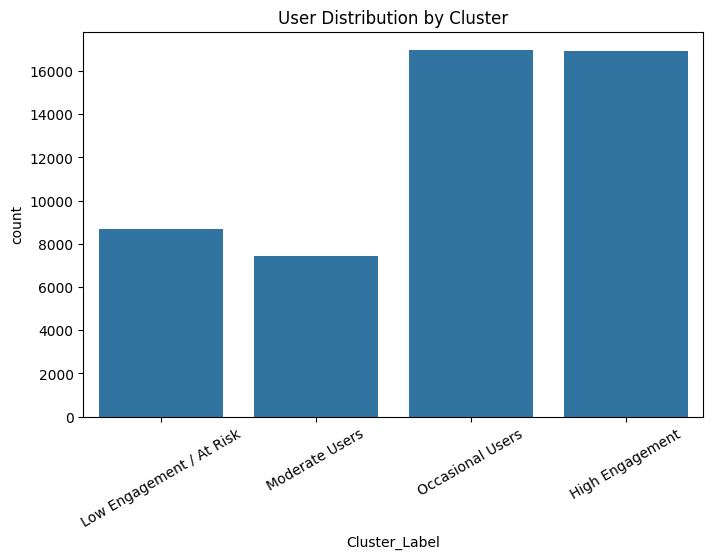

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x='Cluster_Label', data=df)
plt.xticks(rotation=30)
plt.title("User Distribution by Cluster")
plt.show()

In [142]:
categorical_profiles = df_original.groupby('Cluster').agg({
    'gender': lambda x: x.mode()[0],
    'device_type': lambda x: x.mode()[0],
    'subscription_type': lambda x: x.mode()[0],
    'marketing_source': lambda x: x.mode()[0]
})

categorical_profiles


,gender,device_type,subscription_type,marketing_source
Cluster,,,,
0,Female,Android,Free,Organic
1,Female,Android,Free,Organic
2,Female,Android,Free,Organic
3,Male,Android,Free,Organic


In [143]:
cluster_counts = df['Clusters'].value_counts()
cluster_counts


,count
Clusters,
3,16969
0,16940
2,8668
1,7423


Business Insight & Customer Action Mapping Code

In [146]:
print([col for col in df.columns if 'subscription_type' in col])

['subscription_type_Free', 'subscription_type_Premium']


In [155]:
median_engagement = df['engagement_score'].median()

df['user_segment'] = 'Moderate Users'

df.loc[
    (df['engagement_score'] > median_engagement) &
    (df['subscription_type_Premium'] == 1),
    'user_segment'
] = 'High Value Users'

df.loc[
    df['days_since_last_login'] > 14,
    'user_segment'
] = 'At Risk Users'

df.loc[
    df['engagement_score'] < median_engagement,
    'user_segment'
] = 'Low Engagement Users'

In [156]:
def assign_segment(row):

    if (row['engagement_score'] > df['engagement_score'].median()) and (row['subscription_type_Premium']):
        return 'High Value Users'

    elif (row['churn_risk_score'] > 0.7) or (row['days_since_last_login'] > 15):
        return 'At Risk Users'

    else:
        return 'Moderate Users'

df['user_segment'] = df.apply(assign_segment, axis=1)

def assign_action(row):

    if row['user_segment'] == 'High Value Users':
        return 'Loyalty Rewards & Premium Offers'

    elif row['user_segment'] == 'Moderate Users':
        return 'Personalized Engagement Campaigns'

    elif row['churn_risk_score'] > 0.7:
        return 'Retention Campaign'

    else:
        return 'Re-engagement Notifications'


df['recommended_action'] = df.apply(assign_action, axis=1)

df['recommended_action'].value_counts()




,count
recommended_action,
Re-engagement Notifications,21172
Retention Campaign,13775
Personalized Engagement Campaigns,11411
Loyalty Rewards & Premium Offers,3642


In [157]:
action_summary = df.groupby('user_segment')['recommended_action'].value_counts()
action_summary


user_segment      recommended_action               
At Risk Users     Re-engagement Notifications          21172
                  Retention Campaign                   13775
High Value Users  Loyalty Rewards & Premium Offers      3642
Moderate Users    Personalized Engagement Campaigns    11411
Name: count, dtype: int64

In [160]:
df.columns

Index(['user_id', 'age', 'app_version', 'sessions_per_week',
       'avg_session_duration_min', 'daily_active_minutes',
       'feature_clicks_per_session', 'notifications_opened_per_week',
       'in_app_search_count', 'pages_viewed_per_session',
       'crash_events_last_30_days', 'support_tickets_raised',
       'days_since_last_login', 'ads_clicked_last_30_days',
       'content_downloads', 'social_shares', 'rating_given',
       'churn_risk_score', 'engagement_score', 'account_age_days',
       'gender_Male', 'gender_Other', 'country_Canada', 'country_Germany',
       'country_India', 'country_Singapore', 'country_UK', 'country_USA',
       'device_type_Web', 'device_type_iOS', 'subscription_type_Free',
       'subscription_type_Premium', 'marketing_source_Facebook Ads',
       'marketing_source_Google Ads', 'marketing_source_Organic',
       'marketing_source_Referral', 'engagement_per_session',
       'clicks_per_minute', 'inactive_ratio', 'is_dormant', 'low_rating_flag',
      

In [162]:
df[['gender_Male', 'user_segment', 'recommended_action']]


,gender_Male,user_segment,recommended_action
0,False,At Risk Users,Re-engagement Notifications
1,True,At Risk Users,Retention Campaign
2,False,At Risk Users,Re-engagement Notifications
3,True,At Risk Users,Re-engagement Notifications
4,True,At Risk Users,Re-engagement Notifications
...,...,...,...
49995,True,Moderate Users,Personalized Engagement Campaigns
49996,False,Moderate Users,Personalized Engagement Campaigns
49997,True,At Risk Users,Re-engagement Notifications
49998,True,Moderate Users,Personalized Engagement Campaigns


In [163]:
df[['gender_Other', 'user_segment', 'recommended_action']]

,gender_Other,user_segment,recommended_action
0,False,At Risk Users,Re-engagement Notifications
1,False,At Risk Users,Retention Campaign
2,False,At Risk Users,Re-engagement Notifications
3,False,At Risk Users,Re-engagement Notifications
4,False,At Risk Users,Re-engagement Notifications
...,...,...,...
49995,False,Moderate Users,Personalized Engagement Campaigns
49996,False,Moderate Users,Personalized Engagement Campaigns
49997,False,At Risk Users,Re-engagement Notifications
49998,False,Moderate Users,Personalized Engagement Campaigns


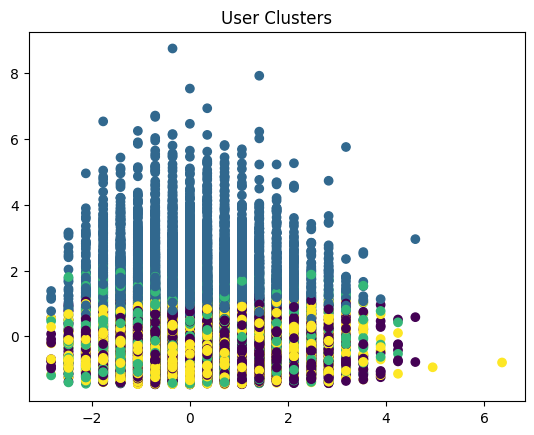

In [164]:
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=df['Clusters'], cmap='viridis')
plt.title("User Clusters")
plt.show()


In [165]:
final_business_table = df.groupby('Cluster_Label').agg({
    'engagement_score': 'mean',
    'churn_risk_score': 'mean',
    'Cluster_Label': 'count'
}).rename(columns={'Cluster_Label': 'User_Count'}).round(2)

final_business_table

,engagement_score,churn_risk_score,User_Count
Cluster_Label,,,
High Engagement,65.16,0.50,16940
Low Engagement / At Risk,64.66,0.49,8668
Moderate Users,64.92,0.50,7423
Occasional Users,64.87,0.50,16969
